In [27]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('Premier League Player Stats.csv')

In [29]:
df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [30]:
##Entendendo os dados

# Rank : Rank of the player | Rank do Jogador
# Player : Player name | Nome do Jogador
# Team : Player team name | Nome do Time
# GP : Games played | Jogos atuando
# GS : Games started | Jogos iniciando como titular
# MIN : Minutes played | Minutos Jogados
# G : Goals | Gols
# ASST : Assists | Assistencias
# SHOTS : Total shots | Total de Chutes
# SOG : Shots on goal | Chutes no Gol

# Análise de eficiência

A análise de eficiência dos jogadores de futebol é uma forma de medir a capacidade de um jogador de marcar gols e fornecer assistências durante um jogo. Essa análise é importante porque gols e assistências são fundamentais para o sucesso de um time.

Para realizar essa análise, é necessário coletar dados sobre minutos jogados, gols e assistências de cada jogador. A partir desses dados, é possível calcular a taxa de gols e a taxa de assistências por minuto jogado. Essas taxas servem como indicadores de eficiência e permitem comparar o desempenho dos jogadores.

In [31]:
# Adicionar uma coluna de taxa de gols
df["taxa_gols"] = df["G"] / df["MIN"]

# Ordenar os jogadores pela taxa de gols
df = df.sort_values("taxa_gols", ascending=False)

# Imprimir os jogadores com as maiores taxas de gols
print(df[["PLAYER", "TEAM", "MIN", "G", "taxa_gols"]].head())

                                PLAYER               TEAM   MIN   G  taxa_gols
10   Sergio Leonel Agüero del Castillo    Manchester City  1456  16   0.010989
244                       Curtis Jones          Liverpool   122   1   0.008197
32                      Olivier Giroud            Chelsea   999   8   0.008008
1                           Danny Ings        Southampton  2812  22   0.007824
23                     Mason Greenwood  Manchester United  1312  10   0.007622


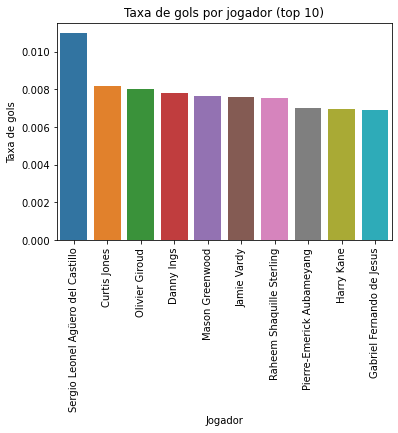

In [32]:
# Mostrar os 10 primeiros jogadores
df_top10 = df.head(10)

# Criar um gráfico de barras com os 10 primeiros jogadores
sns.barplot(x="PLAYER", y="taxa_gols", data=df_top10)

# Adicionar rótulos de eixo e título
plt.xlabel("Jogador")
plt.ylabel("Taxa de gols")
plt.title("Taxa de gols por jogador (top 10)")

# Rotacionar os nomes dos jogadores na vertical
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()

In [33]:
# Adicionar uma coluna de taxa de assistências
df["taxa_assistencias"] = df["ASST"] / df["MIN"]

# Ordenar os jogadores pela taxa de assistências
df = df.sort_values("taxa_assistencias", ascending=False)

# Imprimir os jogadores com as maiores taxas de assistências
print(df[["PLAYER", "TEAM", "MIN", "ASST", "taxa_assistencias"]].head())

                            PLAYER               TEAM   MIN  ASST  \
14                 Kevin De Bruyne    Manchester City  2798    20   
425                   Andy Carroll   Newcastle United   618     4   
238             Callum Hudson-Odoi            Chelsea   850     5   
35   Bruno Miguel Borges Fernandes  Manchester United  1192     7   
41                     David Silva    Manchester City  1832    10   

     taxa_assistencias  
14            0.007148  
425           0.006472  
238           0.005882  
35            0.005872  
41            0.005459  


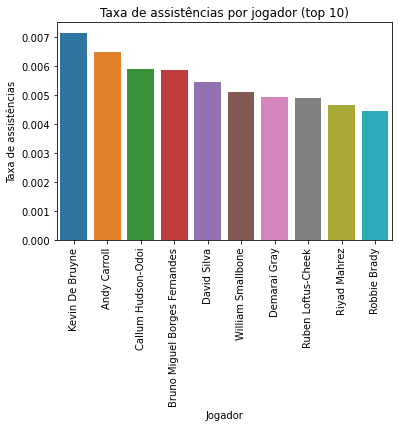

In [26]:
# Mostrar os 10 primeiros jogadores com as maiores taxas de assistências
df_top10_assist = df.sort_values("taxa_assistencias", ascending=False).head(10)

# Criar um gráfico de barras com os 10 primeiros jogadores
sns.barplot(x="PLAYER", y="taxa_assistencias", data=df_top10_assist)

# Adicionar rótulos de eixo e título
plt.xlabel("Jogador")
plt.ylabel("Taxa de assistências")
plt.title("Taxa de assistências por jogador (top 10)")

# Rotacionar os nomes dos jogadores na vertical
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()

# Quantidade necessária de chutes para marcar

A análise da eficiência de gols por chute no gol é uma forma de medir a capacidade de um jogador de marcar gols em relação ao número de chutes no gol. Essa análise é importante porque permite identificar jogadores altamente eficientes e comparar o desempenho entre jogadores.

Para realizar essa análise, é necessário coletar dados sobre chutes no gol e gols marcados por cada jogador. A partir desses dados, é possível calcular a taxa de gols por chute no gol. Essa taxa serve como indicador de eficiência e permite comparar o desempenho dos jogadores.

Aqui esta um gráficos de barras para comparar a taxa de gols por chute no gol dos 10 jogadores mais eficientes e dos 10 jogadores menos eficientes:

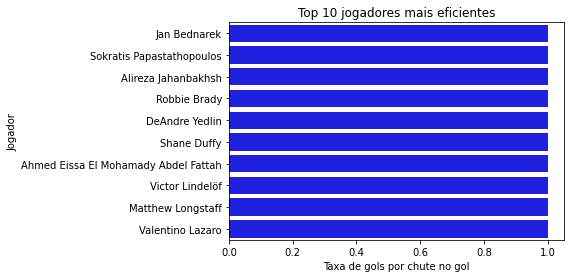

In [44]:
# Adicionar uma coluna de taxa de gols por chute no gol
df["taxa_gols_por_chute"] = df["G"] / df["SOG"]

# Ordenar os jogadores pela taxa de gols por chute no gol
df = df.sort_values("taxa_gols_por_chute", ascending=False)

# Criar um gráfico de barras com os 10 jogadores mais eficientes
sns.barplot(x="taxa_gols_por_chute", y="PLAYER", data=df_top10_eficientes, color='b')

# Adicionar rótulos de eixo e título
plt.ylabel("Jogador")
plt.xlabel("Taxa de gols por chute no gol")
plt.title("Top 10 jogadores mais eficientes")

# rotacionar os nomes dos jogadores na horizontal
plt.yticks(rotation = 0)

# Mostrar o gráfico
plt.show()

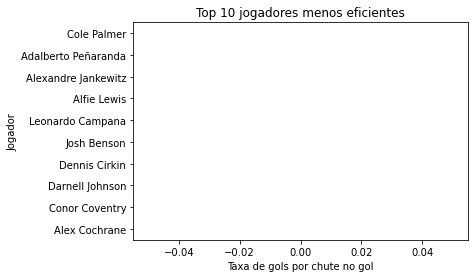

In [46]:
# Criar um gráfico de barras com os 10 jogadores menos eficientes
sns.barplot(x="taxa_gols_por_chute", y="PLAYER", data=df_top10_ineficientes, color='r')

# Adicionar rótulos de eixo e título
plt.ylabel("Jogador")
plt.xlabel("Taxa de gols por chute no gol")
plt.title("Top 10 jogadores menos eficientes")

# rotacionar os nomes dos jogadores na horizontal
plt.yticks(rotation = 0)

# Mostrar o gráfico
plt.show()

In [47]:
#Filtrar jogadores que marcaram mais de 1 gol
df_filtrado = df[df["G"]>1]

# Adicionar uma coluna de taxa de gols por chute no gol
df_filtrado["taxa_gols_por_chute"] = df_filtrado["G"] / df_filtrado["SOG"]

# Ordenar os jogadores pela taxa de gols por chute no gol
df_filtrado = df_filtrado.sort_values("taxa_gols_por_chute", ascending=False)

Ao desconsiderar jogadores que marcaram apenas 1 gol ou não marcaram nenhum, a análise da eficiência de gols por chute no gol se torna mais precisa e confiável. Isso ocorre porque jogadores que marcaram apenas 1 gol ou não marcaram nenhum têm uma amostra pequena de dados, o que pode distorcer a análise. Além disso, esses jogadores podem ter jogado pouco tempo, o que pode afetar sua taxa de gols por chute no gol.

Além disso, remover jogadores com menos gols marcados também ajuda a identificar jogadores com uma performance consistente e mais confiável, afinal jogadores que não marcaram muitos gols pode não ser tão eficientes assim, e incluindo-os na análise pode distorcer os resultados. Assim, essa mudança na análise permite comparar jogadores com um histórico de desempenho mais consistente e comparáveis, o que resulta em uma análise mais precisa.

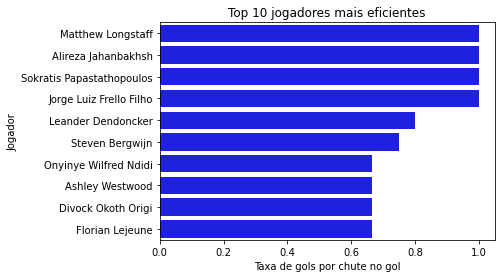

In [50]:
# Mostrar os 10 primeiros jogadores com as maiores taxas de gols por chute no gol
df_top10_eficientes = df_filtrado.sort_values("taxa_gols_por_chute", ascending=False).head(10)

# Mostrar os 10 últimos jogadores com as menores taxas de gols por chute no gol
df_top10_ineficientes = df_filtrado.sort_values("taxa_gols_por_chute", ascending=True).tail(10)

# Criar um gráfico de barras com os 10 jogadores mais eficientes
sns.barplot(x="taxa_gols_por_chute", y="PLAYER", data=df_top10_eficientes, color='b')

# Adicionar rótulos de eixo e título
plt.ylabel("Jogador")
plt.xlabel("Taxa de gols por chute no gol")
plt.title("Top 10 jogadores mais eficientes")

# rotacionar os nomes dos jogadores na horizontal
plt.yticks(rotation = 0)

# Mostrar o gráfico
plt.show()


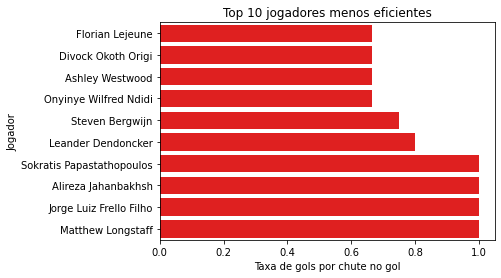

In [51]:
# Criar um gráfico de barras com os 10 jogadores menos eficientes
sns.barplot(x="taxa_gols_por_chute", y="PLAYER", data=df_top10_ineficientes, color='r')

# Adicionar rótulos de eixo e título
plt.ylabel("Jogador")
plt.xlabel("Taxa de gols por chute no gol")
plt.title("Top 10 jogadores menos eficientes")

# rotacionar os nomes dos jogadores na horizontal
plt.yticks(rotation = 0)

# Mostrar o gráfico
plt.show()

In [54]:
# Calcular o número médio de gols marcados por jogo
gols_por_jogo = df['G'] / df['GP']

# Calcular o número médio de minutos jogados por jogo
minutos_por_jogo = df['MIN'] / df['GP']

# Adicionar colunas de gols por jogo e minutos por jogo ao dataframe
df['gols_por_jogo'] = gols_por_jogo
df['minutos_por_jogo'] = minutos_por_jogo

# Selecionar jogadores com taxa de gols por jogo acima da média e minutos por jogo acima da média
jogadores_com_potencial = df[(df['gols_por_jogo'] > df['gols_por_jogo'].mean()) & (df['minutos_por_jogo'] > df['minutos_por_jogo'].mean())]

# classificar jogadores por gols marcados
jogadores_com_potencial = jogadores_com_potencial.sort_values("G", ascending=False)

# mostrar os jogadores com maior potencial
jogadores_com_potencial.head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,taxa_gols,taxa_assistencias,taxa_gols_por_chute,taxa_gols_por_minuto,gols_por_jogo,minutos_por_jogo
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,0.007581,0.001648,0.534884,0.007581,0.657143,86.685714
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,0.007011,0.000956,0.523810,0.007011,0.611111,87.166667
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,0.007824,0.000711,0.578947,0.007824,0.578947,74.000000
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,0.007519,0.000376,0.526316,0.007519,0.606061,80.606061
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,0.006588,0.003467,0.322034,0.006588,0.558824,84.823529
6,7,Harry Kane,Tottenham Hotspur,29,29,2589,18,2,62,37,0.006952,0.000772,0.486486,0.006952,0.620690,89.275862
5,6,Sadio Mané,Liverpool,35,31,2753,18,7,66,36,0.006538,0.002543,0.500000,0.006538,0.514286,78.657143
7,8,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers,38,37,3244,17,6,89,44,0.005240,0.001850,0.386364,0.005240,0.447368,85.368421
8,9,Marcus Rashford,Manchester United,31,31,2653,17,7,77,44,0.006408,0.002639,0.386364,0.006408,0.548387,85.580645
9,10,Anthony Martial,Manchester United,32,31,2638,17,6,59,40,0.006444,0.002274,0.425000,0.006444,0.531250,82.437500


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Selecionar apenas as linhas do Manchester United
df_mu = df[df['TEAM'] == 'Manchester United']

# Selecionar as colunas de minutos jogados, gols marcados e assistências como variáveis de entrada
X = df_mu[['MIN', 'G', 'ASST']]

# Selecionar a coluna de gols sofridos como variável de saída
y = df_mu['GS']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Criar um modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treinamento
rf.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = rf.predict(X_test)

# Calcular o erro absoluto médio
mae = mean_absolute_error(y_test, y_pred)

# Imprimir o erro absoluto médio
print("Erro absoluto médio:", mae)


Erro absoluto médio: 0.5016666666666663


A célula acima seleciona apenas as linhas do Manchester United do seu conjunto de dados, seleciona as colunas de minutos jogados, gols marcados e assistências como variáveis de entrada e a coluna de gols sofridos como a variável de saída. Ele então divide os dados em um conjunto de treinamento e um conjunto de teste, cria um modelo de Random Forest, treina o modelo com os dados de treinamento e faz previsões com os dados de teste. Por fim, ele calcula o erro absoluto médio entre as previsões e os valores reais.